# Vector Mathematics Study Guide

Essential concepts to master for vector mathematics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1. Vector Basics

### Definition
A vector is a quantity with both magnitude and direction.

### Representation
- **Component form**: v = (x, y) or v = (x, y, z)
- **Unit vector notation**: v = xi + yj + zk

In [2]:
# Creating vectors
v1 = np.array([3, 4])
v2 = np.array([1, -2, 3])

print(f"2D vector: {v1}")
print(f"3D vector: {v2}")

2D vector: [3 4]
3D vector: [ 1 -2  3]


## 2. Vector Magnitude (Length)

**Formula**: ||v|| = √(x² + y² + z²)

In [3]:
def magnitude(v):
    return np.sqrt(np.sum(v**2))

mag_v1 = magnitude(v1)
mag_v2 = np.linalg.norm(v2)  # NumPy built-in

print(f"Magnitude of v1: {mag_v1}")
print(f"Magnitude of v2: {mag_v2}")

Magnitude of v1: 5.0
Magnitude of v2: 3.7416573867739413


## 3. Unit Vectors

A unit vector has magnitude 1. **Formula**: û = v/||v||

In [10]:
def unit_vector(v):
    return v / np.linalg.norm(v)

u1 = unit_vector(v1)
print(f"Unit vector of v1: {u1}")
print(f"Magnitude check: {np.linalg.norm(u1)}")

Unit vector of v1: [0.6 0.8]
Magnitude check: 1.0


## 4. Vector Addition and Subtraction

- **Addition**: v + w = (v₁ + w₁, v₂ + w₂, v₃ + w₃)
- **Subtraction**: v - w = (v₁ - w₁, v₂ - w₂, v₃ - w₃)

In [11]:
a = np.array([2, 3])
b = np.array([1, -1])

addition = a + b
subtraction = a - b

print(f"a + b = {addition}")
print(f"a - b = {subtraction}")

a + b = [3 2]
a - b = [1 4]


## 5. Scalar Multiplication

**Formula**: kv = (kv₁, kv₂, kv₃)

In [12]:
scalar = 3
scaled_vector = scalar * v1

print(f"Original: {v1}")
print(f"Scaled by {scalar}: {scaled_vector}")

Original: [3 4]
Scaled by 3: [ 9 12]


## 6. Dot Product (Scalar Product)

**Formula**: v · w = v₁w₁ + v₂w₂ + v₃w₃ = ||v|| ||w|| cos(θ)

**Key Properties**:
- If v · w = 0, vectors are perpendicular
- If v · w > 0, angle < 90°
- If v · w < 0, angle > 90°

In [17]:
def dot_product(v, w):
    return np.sum(v * w)

def angle_between(v, w):
    cos_angle = np.dot(v, w) / (np.linalg.norm(v) * np.linalg.norm(w))
    return np.arccos(np.clip(cos_angle, -1, 1))

dot = np.dot(a, b)
angle = angle_between(a, b)

print(f"Dot product: {dot}")
print(f"Angle (radians): {angle:.3f}")
print(f"Angle (degrees): {np.degrees(angle):.1f}°")

Dot product: -1
Angle (radians): 1.768
Angle (degrees): 101.3°


## 7. Cross Product (Vector Product)

**Formula**: v × w = (v₂w₃ - v₃w₂, v₃w₁ - v₁w₃, v₁w₂ - v₂w₁)

**Properties**:
- Result is perpendicular to both vectors
- Magnitude = ||v|| ||w|| sin(θ)
- Right-hand rule determines direction

In [18]:
v3d_1 = np.array([1, 2, 3])
v3d_2 = np.array([4, 5, 6])

cross = np.cross(v3d_1, v3d_2)

print(f"v1 = {v3d_1}")
print(f"v2 = {v3d_2}")
print(f"v1 × v2 = {cross}")

# Verify perpendicularity
print(f"Cross · v1 = {np.dot(cross, v3d_1)} (should be 0)")
print(f"Cross · v2 = {np.dot(cross, v3d_2)} (should be 0)")

v1 = [1 2 3]
v2 = [4 5 6]
v1 × v2 = [-3  6 -3]
Cross · v1 = 0 (should be 0)
Cross · v2 = 0 (should be 0)


## 8. Vector Projection

**Scalar projection**: comp_w(v) = (v · w) / ||w||

**Vector projection**: proj_w(v) = ((v · w) / ||w||²) × w

In [19]:
def vector_projection(v, w):
    return (np.dot(v, w) / np.dot(w, w)) * w

def scalar_projection(v, w):
    return np.dot(v, w) / np.linalg.norm(w)

proj = vector_projection(a, b)
scalar_proj = scalar_projection(a, b)

print(f"Vector projection of a onto b: {proj}")
print(f"Scalar projection: {scalar_proj:.3f}")

Vector projection of a onto b: [-0.5  0.5]
Scalar projection: -0.707


## 9. Distance Between Points

**Formula**: d = ||P₂ - P₁||

In [20]:
P1 = np.array([1, 2, 3])
P2 = np.array([4, 6, 8])

distance = np.linalg.norm(P2 - P1)
print(f"Distance between points: {distance:.3f}")

Distance between points: 7.071


## 10. Linear Independence

Vectors are linearly independent if no vector can be written as a linear combination of others.

In [25]:
def are_linearly_independent(vectors):
    matrix = np.column_stack(vectors)
    rank = np.linalg.matrix_rank(matrix)
    return rank == len(vectors)

vec1 = np.array([1, 0, 0])
vec2 = np.array([0, 1, 0])
vec3 = np.array([0, 0, 1])

independent = are_linearly_independent([vec1, vec2, vec3])
print(f"Vectors are linearly independent: {independent}")

Vectors are linearly independent: True


## 11. Vector Visualization

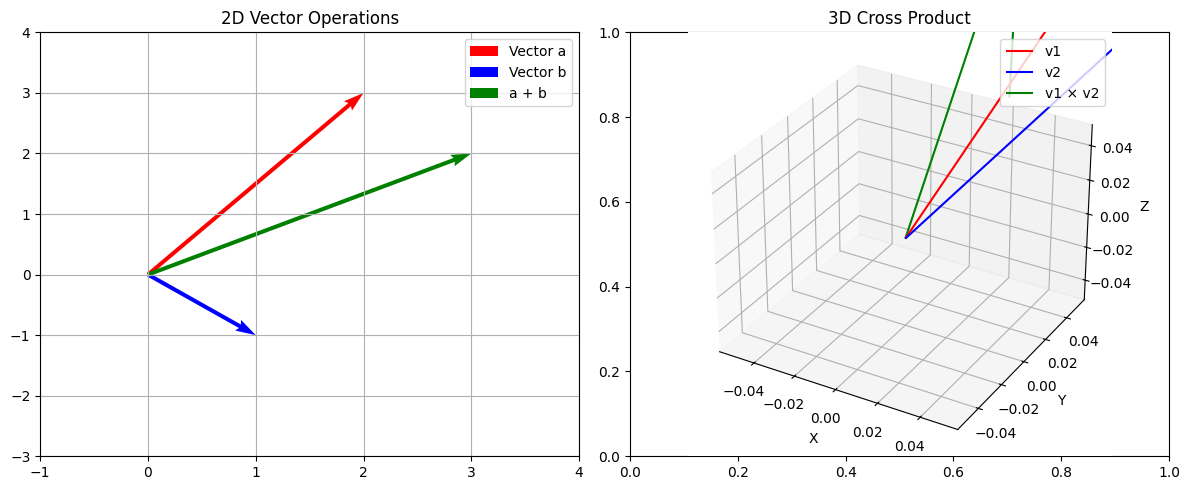

In [29]:
# 2D Vector Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 2D vectors
origin = [0, 0]
ax1.quiver(*origin, *a, angles='xy', scale_units='xy', scale=1, color='red', label='Vector a')
ax1.quiver(*origin, *b, angles='xy', scale_units='xy', scale=1, color='blue', label='Vector b')
ax1.quiver(*origin, *(a+b), angles='xy', scale_units='xy', scale=1, color='green', label='a + b')
ax1.set_xlim(-1, 4)
ax1.set_ylim(-3, 4)
ax1.grid(True)
ax1.legend()
ax1.set_title('2D Vector Operations')

# 3D vectors
ax2 = fig.add_subplot(122, projection='3d')
origin_3d = [0, 0, 0]
ax2.quiver(*origin_3d, *v3d_1, color='red', label='v1')
ax2.quiver(*origin_3d, *v3d_2, color='blue', label='v2')
ax2.quiver(*origin_3d, *cross, color='green', label='v1 × v2')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.legend()
ax2.set_title('3D Cross Product')

plt.tight_layout()
plt.show()

## 12. Practice Problems

### Problem 1: Find the angle between vectors
Given v = (3, 4) and w = (1, 2), find the angle between them.

In [30]:
# Your solution here
v = np.array([3, 4])
w = np.array([1, 2])

angle = angle_between(v, w)
print(f"Angle: {np.degrees(angle):.1f}°")

Angle: 10.3°


### Problem 2: Vector projection
Project vector u = (2, 3, 1) onto v = (1, 0, 1).

In [31]:
# Your solution here
u = np.array([2, 3, 1])
v = np.array([1, 0, 1])

proj = vector_projection(u, v)
print(f"Projection: {proj}")

Projection: [1.5 0.  1.5]


## Key Concepts to Master:

1. **Vector representation** and component form
2. **Magnitude calculation** and unit vectors
3. **Vector addition/subtraction** and geometric interpretation
4. **Dot product** and its applications (angles, perpendicularity)
5. **Cross product** and right-hand rule
6. **Vector projections** (scalar and vector)
7. **Linear independence** and span
8. **Distance formulas** using vectors
9. **Geometric interpretations** of all operations
10. **Applications** in physics and engineering

Practice these concepts regularly and visualize them geometrically!